In [ ]:
# import the data and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io

In [567]:
df = pd.read_csv(io.BytesIO(uploaded['loans_train_data.csv']))
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,NaN,NaN,NaN,...,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,NaN,NaN,NaN,...,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,NaN,NaN,NaN,...,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5


## Data Exploration

In [568]:
# data shape
df.shape

(7000, 46)

In [569]:
# datatypes for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         6431 non-null   object 
 1   emp_length                        6443 non-null   float64
 2   state                             7000 non-null   object 
 3   homeownership                     7000 non-null   object 
 4   annual_income                     7000 non-null   float64
 5   verified_income                   7000 non-null   object 
 6   debt_to_income                    6986 non-null   float64
 7   annual_income_joint               1059 non-null   float64
 8   verification_income_joint         1034 non-null   object 
 9   debt_to_income_joint              1059 non-null   float64
 10  delinq_2y                         7000 non-null   int64  
 11  months_since_last_delinq          3060 non-null   float64
 12  earlie

In [570]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,id
count,6443.000000,7.000000e+03,6986.000000,1059.000000,1059.000000,7000.000000,3060.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000
mean,5.939159,7.949433e+04,19.261134,129198.038886,19.868687,0.218000,36.982026,2001.245714,1.961286,22.628286,...,8.073857,5.203857,1.378000,94.515414,0.044857,0.126000,16354.142857,43.241143,12.47482,3500.500000
std,3.718397,6.634772e+04,14.486939,68403.158182,8.112970,0.683875,21.707648,7.805605,2.404231,11.907816,...,4.855489,3.259727,1.700786,9.290584,0.681635,0.338691,10317.557647,11.016833,5.01296,2020.870275
min,0.000000,0.000000e+00,0.000000,19200.000000,0.320000,0.000000,1.000000,1963.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.31000,1.000000
25%,2.000000,4.500000e+04,11.050000,87000.000000,13.945000,0.000000,19.000000,1997.000000,0.000000,14.000000,...,5.000000,3.000000,0.000000,92.300000,0.000000,0.000000,8293.750000,36.000000,9.43000,1750.750000
50%,6.000000,6.500000e+04,17.540000,115000.000000,19.560000,0.000000,34.000000,2003.000000,1.000000,21.000000,...,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14400.000000,36.000000,11.98000,3500.500000
75%,10.000000,9.500000e+04,25.007500,155000.000000,25.360000,0.000000,53.000000,2006.000000,3.000000,29.000000,...,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.05000,5250.250000
max,10.000000,2.300000e+06,469.090000,690000.000000,39.980000,13.000000,109.000000,2015.000000,26.000000,87.000000,...,38.000000,29.000000,14.000000,100.000000,52.000000,3.000000,40000.000000,60.000000,30.94000,7000.000000


In [571]:
# null values
df.isnull().sum()

emp_title                            569
emp_length                           557
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        14
annual_income_joint                 5941
verification_income_joint           5966
debt_to_income_joint                5941
delinq_2y                              0
months_since_last_delinq            3940
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               5389
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

## Data Cleaning and Preprocessing

In [572]:
df['months_since_last_credit_inquiry']=df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].mean())

In [573]:
df = df.drop(['num_accounts_120d_past_due','num_accounts_120d_past_due','annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_90d_late','emp_title','state','disbursement_method'],axis=1)

In [574]:
#df.loc[df['emp_title'].isnull(),'emp_title'] = 'Unknown'

In [575]:
df = df.dropna(subset=['emp_length'])

In [576]:
df['months_since_last_delinq'] = df['months_since_last_delinq'].fillna(df['months_since_last_delinq'].max())

In [577]:
df.loc[df['total_credit_limit']>1000000,'total_credit_limit']=1000000
df.loc[df['annual_income']>500000,'annual_income'] = 500000
df.loc[df['total_debit_limit']>150000,'total_debit_limit']=150000
df.loc[df['debt_to_income']>80,'debt_to_income']=80
df.loc[df['inquiries_last_12m']>10,'debt_to_income']=10
df.loc[df['account_never_delinq_percent']<50,'account_never_delinq_percent']=50
df.loc[df['accounts_opened_24m']>18,'accounts_opened_24m']=18
df.loc[df['earliest_credit_line']<1975,'earliest_credit_line']=1975
df.loc[df['delinq_2y']>5,'delinq_2y']=5

In [578]:
df.loc[df['num_cc_carrying_balance']>18,'num_cc_carrying_balance']=18

## Visualization

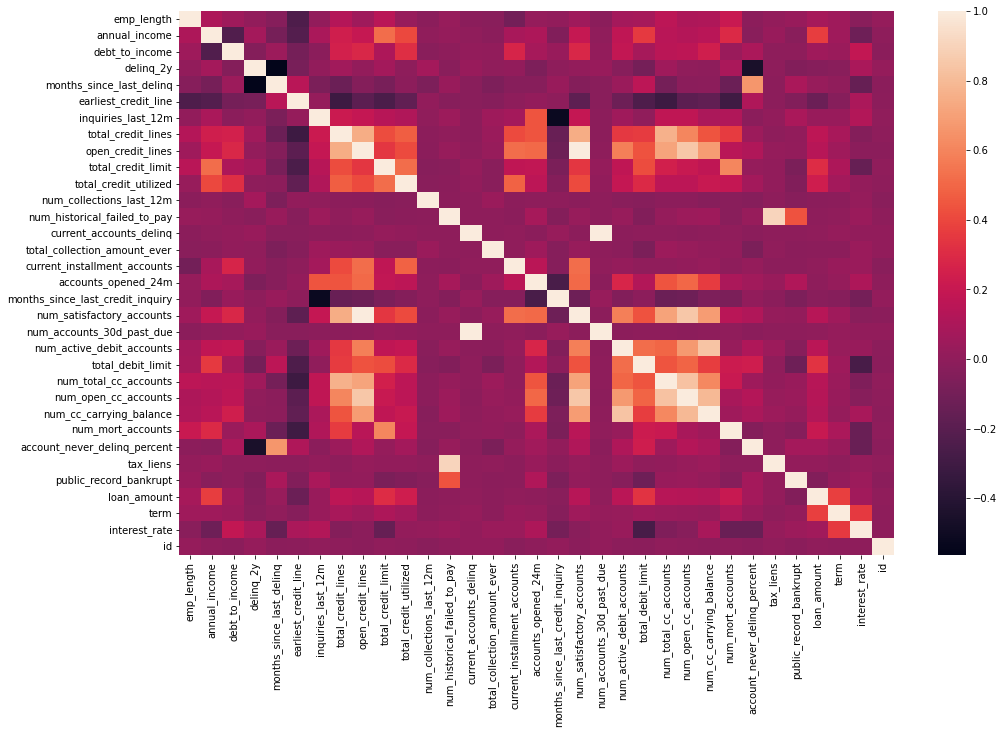

In [579]:
# visualize the data
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Distribution of Loans across different purposes')

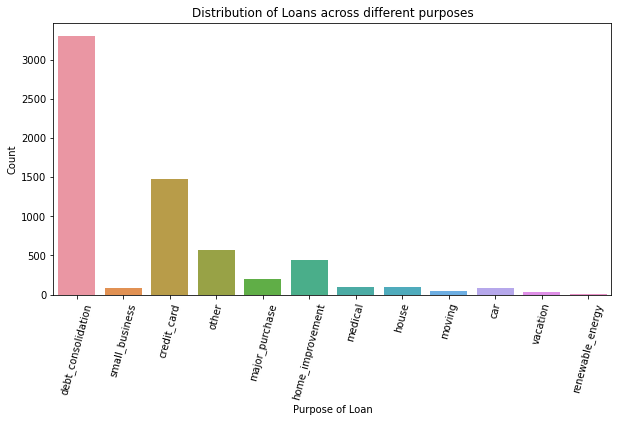

In [580]:
plt.figure(figsize=(10,5))
sns.countplot(x ='loan_purpose',data = df)
plt.xticks(rotation=75)
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.title('Distribution of Loans across different purposes')

Text(0, 0.5, 'Credit limit')

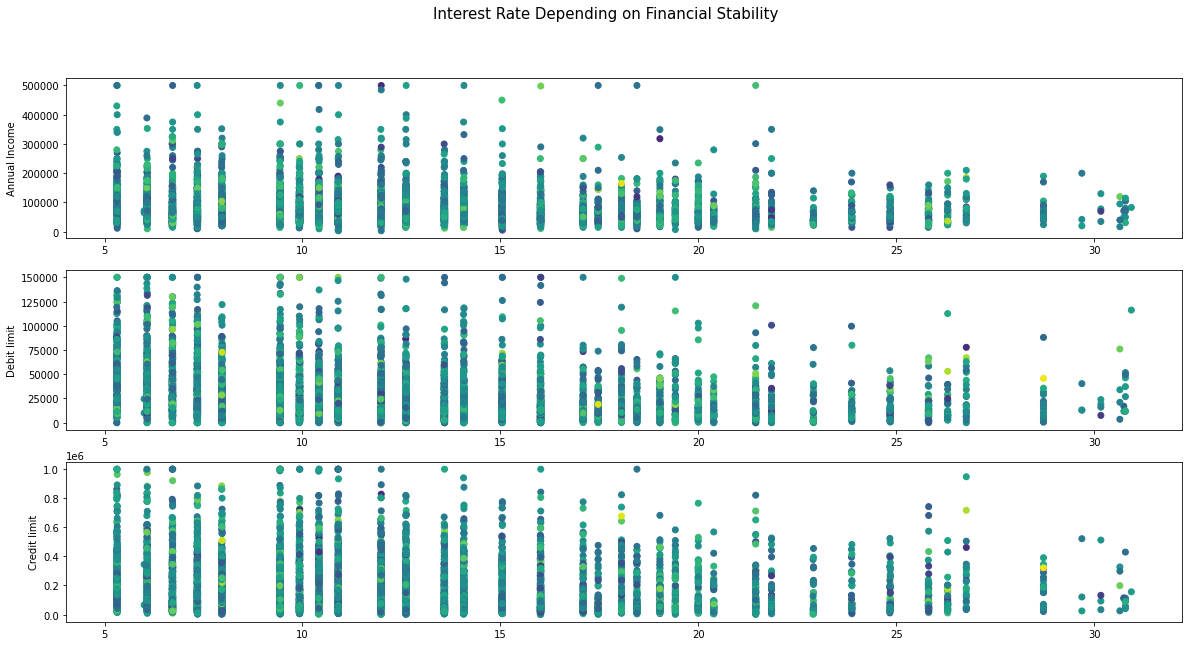

In [581]:
plt.figure(figsize=(20,10))
color = np.random.randn(6443)

plt.suptitle('Interest Rate Depending on Financial Stability', fontsize=15)
plt.subplot(311)
#area = [df.interest_rate[i] * df.annual_income[i] for i in range(len(df.interest_rate))]
#size = [6443*i for i in area]
plt.scatter(df.interest_rate,df.annual_income, c=color )
plt.ylabel('Annual Income')
plt.subplot(312)
plt.scatter(df.interest_rate,df.total_debit_limit, c=color )
plt.ylabel('Debit limit')
plt.subplot(313)
plt.scatter(df.interest_rate,df.total_credit_limit, c=color )
plt.ylabel('Credit limit')

#plt.title('Interest Rate Depending on Financial Stability')

Text(0.5, 1.0, 'Dependency of Loan Approval on Credit Line')

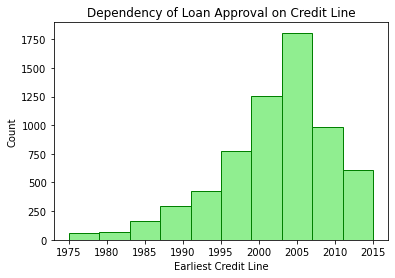

In [582]:
plt.hist(df['earliest_credit_line'],color = "lightgreen", ec="green")
plt.ylabel('Count')
plt.xlabel('Earliest Credit Line')
plt.title('Dependency of Loan Approval on Credit Line')

<Figure size 2160x1080 with 0 Axes>

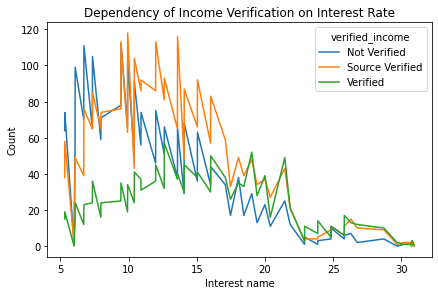

In [583]:
plt.figure(figsize=(30,15))
my_pivot = df.pivot_table(index = 'interest_rate', 
                          columns = 'verified_income', 
                          fill_value = 0, 
                          aggfunc={'verified_income':len})['verified_income']
my_pivot.plot.line()
plt.tight_layout()
plt.xlabel('Interest name')
plt.ylabel('Count')
plt.title('Dependency of Income Verification on Interest Rate')
plt.show()

## Feature Engineering

#### 1]   Categorical Encoding

In [584]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['homeownership']= label_encoder.fit_transform(df['homeownership'])
df['verified_income']= label_encoder.fit_transform(df['verified_income'])
df['loan_purpose']= label_encoder.fit_transform(df['loan_purpose'])
df['application_type']= label_encoder.fit_transform(df['application_type'])
df['initial_listing_status']= label_encoder.fit_transform(df['initial_listing_status'])

#### 2] Feature Scaling

In [585]:
y_ = df['interest_rate']

In [586]:
df = df.drop('interest_rate',axis=1)

In [587]:
from sklearn.preprocessing import StandardScaler

In [588]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_df)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-1.059452,1.181246,-0.671009,0.187934,-1.088024,-0.341281,0.818940,1.268492,-0.822037,-1.490066,...,-0.813807,0.599904,-0.063766,-0.363979,-0.322573,-0.408137,-0.446765,1.501346,0.467846,-1.734920
1,1.092179,1.181246,-0.248389,0.187934,0.037830,-0.341281,0.818940,-3.590542,-0.409064,-0.735844,...,-0.223737,0.599904,-0.063766,2.654188,3.200778,-0.408137,-0.909943,-0.666069,0.467846,-1.734425
2,1.092179,0.109458,-1.222252,0.187934,0.206525,-0.341281,0.818940,0.728600,-0.409064,-1.154856,...,-0.813807,0.599904,-0.063766,-0.363979,-0.762992,-0.408137,-1.122233,-0.666069,0.467846,-1.733930
3,-1.059452,-0.962331,-0.854756,1.534831,1.557000,-0.341281,-1.256658,0.728600,0.416883,-0.568239,...,-0.223737,-0.079496,-0.063766,-0.363979,-0.322573,-0.408137,-0.369568,1.501346,0.467846,-1.733435
4,-1.059452,1.181246,-0.873131,-1.158963,-0.493008,-0.341281,0.818940,1.268492,-0.822037,-1.238659,...,-0.813807,0.599904,-0.063766,-0.363979,-0.762992,-0.408137,-1.488916,-0.666069,0.467846,-1.732939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,-1.328406,-0.962331,0.615224,-1.158963,0.386221,-0.341281,0.818940,-1.026052,-0.409064,0.940206,...,0.956402,0.599904,-0.063766,-0.363979,-0.762992,-0.408137,0.325199,-0.666069,0.467846,1.729552
6439,-0.790498,1.181246,0.642419,1.534831,-0.443500,-0.341281,0.818940,-0.351186,-0.409064,-1.071054,...,0.366332,0.599904,-0.063766,-0.363979,-0.762992,-0.408137,-0.639756,-0.666069,0.467846,1.730047
6440,0.823225,1.181246,2.177079,0.187934,-0.934915,1.255578,-1.723667,-0.756105,-0.822037,0.772601,...,-0.813807,-3.169670,-0.063766,-0.363979,-0.762992,-0.408137,-0.060783,-0.666069,0.467846,1.730542
6441,0.554271,-0.962331,4.933293,0.187934,-0.604860,-0.341281,0.818940,-1.161025,0.003910,0.018379,...,1.546471,0.599904,-0.063766,-0.363979,-0.762992,-0.408137,-0.157278,-0.666069,0.467846,1.731038


## Modeling

In [ ]:
X = df_scaled
y = y_

#### Linear Regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X, y)

0.3891338347855863

In [ ]:
predict = reg.predict(X_test)
predict.shape

(1289,)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predict,squared = False)

4.070772749174214

#### xgboost Regression

In [ ]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.929 (0.093)


In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
model.fit(X,y)
yhat = model.predict(X_test)

[08:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mse(y_test,yhat))
rmse

## Hyperparameter Tuning

In [558]:
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100]
max_depth = [2, 3, 5, 10]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15]
min_child_weight=[1,2,3]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=20,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[11:04:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=2, min_child_weight=3,
             n_estimators=900)

In [561]:
regressor = XGBRegressor(learning_rate=0.05, max_depth=2, min_child_weight=3,
             n_estimators=900)

In [562]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.886 (0.095)


In [563]:
regressor.fit(X,y)
yhat = regressor.predict(X_test)

[11:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Accuracy

In [564]:
mean_squared_error(y_test,yhat,squared = False)

3.5228696227308425

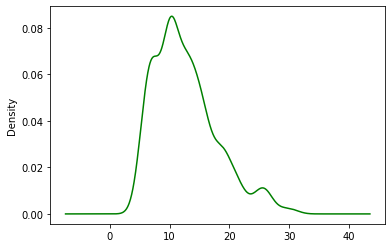

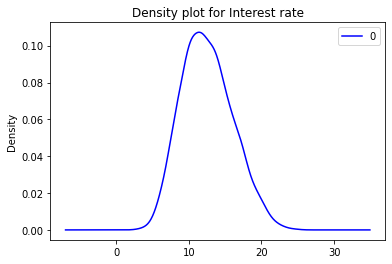

In [592]:
y_test.plot.density(color='green')
pd.DataFrame(yhat).plot.density(color='blue')
plt.title('Density plot for Interest rate')
plt.show()

## Test Data
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import the test data 
uploaded = files.upload()

Saving loans_test_data.csv to loans_test_data.csv


In [ ]:
test_df = pd.read_csv('loans_test_data.csv')
test_df.head()
#test_df2 = test_df.dropna(subset=['emp_length','debt_to_income'])

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,initial_listing_status,disbursement_method,id
0,vp,2.0,IL,MORTGAGE,75000.0,Not Verified,26.19,NaN,NaN,NaN,...,95.2,0,0,credit_card,individual,20000,60,whole,Cash,7001
1,irrigation service technician,5.0,NJ,RENT,28000.0,Source Verified,21.86,NaN,NaN,NaN,...,100.0,0,0,other,individual,2000,36,whole,Cash,7002
2,surgical assistant,2.0,LA,MORTGAGE,25992.0,Verified,9.25,NaN,NaN,NaN,...,88.9,0,0,debt_consolidation,individual,12000,36,whole,Cash,7003
3,NaN,NaN,NV,RENT,33000.0,Source Verified,3.89,NaN,NaN,NaN,...,100.0,0,1,debt_consolidation,individual,5000,36,fractional,Cash,7004
4,teacher,10.0,AL,RENT,47000.0,Not Verified,15.82,NaN,NaN,NaN,...,94.4,0,0,home_improvement,individual,2000,36,fractional,Cash,7005


In [ ]:
test_df['months_since_last_credit_inquiry']=test_df['months_since_last_credit_inquiry'].fillna(test_df['months_since_last_credit_inquiry'].mean())

In [ ]:
test_df = test_df.drop(['num_accounts_120d_past_due','num_accounts_120d_past_due','annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_90d_late','emp_title','state','disbursement_method'],axis=1)

In [ ]:
#test_df = test_df.dropna(subset=['emp_length'])

In [ ]:
test_df['months_since_last_delinq'] = test_df['months_since_last_delinq'].fillna(test_df['months_since_last_delinq'].max())

In [ ]:
test_df.loc[test_df['total_credit_limit']>1000000,'total_credit_limit']=1000000
test_df.loc[test_df['annual_income']>500000,'annual_income'] = 500000
test_df.loc[test_df['total_debit_limit']>150000,'total_debit_limit']=150000
test_df.loc[test_df['debt_to_income']>80,'debt_to_income']=80
test_df.loc[test_df['inquiries_last_12m']>10,'debt_to_income']=10
test_df.loc[test_df['account_never_delinq_percent']<50,'account_never_delinq_percent']=50
test_df.loc[test_df['accounts_opened_24m']>18,'accounts_opened_24m']=18
test_df.loc[test_df['earliest_credit_line']<1975,'earliest_credit_line']=1975
test_df.loc[test_df['delinq_2y']>5,'delinq_2y']=5

In [ ]:
test_df.loc[test_df['num_cc_carrying_balance']>18,'num_cc_carrying_balance']=18
test_df['debt_to_income'] = test_df['debt_to_income'].fillna(test_df['debt_to_income'].mean())
test_df['emp_length'] = test_df['emp_length'].fillna(test_df['emp_length'].min())

In [ ]:
test_df.isnull().sum()

emp_length                          0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_accounts                0
num_cc_carry

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_df['homeownership']= label_encoder.fit_transform(test_df['homeownership'])
test_df['verified_income']= label_encoder.fit_transform(test_df['verified_income'])
test_df['loan_purpose']= label_encoder.fit_transform(test_df['loan_purpose'])
test_df['application_type']= label_encoder.fit_transform(test_df['application_type'])
test_df['initial_listing_status']= label_encoder.fit_transform(test_df['initial_listing_status'])

In [ ]:
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(test_df)
df_scaled1 = pd.DataFrame(scaled_df1)
df_scaled1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.875474,-0.998096,-0.055609,-1.138698,0.634378,-0.338268,-1.356133,-2.003275,-0.409399,-0.152071,...,0.344713,0.023132,-0.131187,-0.355775,-0.774958,-0.412367,0.352632,1.505979,0.454706,-1.731474
1,-0.102391,1.176405,-0.921224,0.185369,0.257497,-0.338268,0.816184,0.336139,-0.409399,-1.081737,...,-0.794835,0.583525,-0.131187,-0.355775,2.275487,-0.412367,-1.400823,-0.664020,0.454706,-1.730319
2,-0.875474,-0.998096,-0.958206,1.509437,-0.840071,1.325346,-1.776582,-0.833568,-0.409399,-1.166252,...,-0.794835,-0.712385,-0.131187,-0.355775,-0.339180,-0.412367,-0.426681,-0.664020,0.454706,-1.729164
3,-1.390862,1.176405,-0.829138,0.185369,-1.306603,-0.338268,0.816184,-0.443666,0.451588,2.045322,...,-0.225061,0.583525,-0.131187,2.642331,-0.339180,-0.412367,-1.108581,-0.664020,-2.199222,-1.728009
4,1.186081,1.176405,-0.571295,-1.138698,-0.268222,-0.338268,-0.281654,-0.703601,-0.839893,-0.405616,...,-0.794835,-0.070267,-0.131187,-0.355775,0.096597,-0.412367,-1.400823,-0.664020,-2.199222,-1.726855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.360085,1.176405,-1.039095,0.185369,0.574321,-0.338268,0.816184,-0.443666,0.882081,0.862110,...,-0.794835,0.583525,-0.131187,2.642331,-0.339180,-0.412367,-0.621510,-0.664020,0.454706,1.726855
2996,-0.617779,-0.998096,-0.737051,-1.138698,-0.762606,-0.338268,0.816184,0.466107,0.882081,-0.912707,...,-0.225061,0.583525,-0.131187,2.642331,0.096597,-0.412367,-1.303409,-0.664020,0.454706,1.728009
2997,-1.133168,1.176405,-0.331869,-1.138698,-1.397995,-0.338268,0.816184,0.856009,-0.839893,-1.588828,...,-0.794835,0.583525,-0.131187,-0.355775,0.968153,-0.412367,-1.011167,-0.664020,-2.199222,1.729164
2998,1.186081,1.176405,-0.355186,1.509437,0.381963,-0.338268,0.816184,0.466107,-0.409399,-0.405616,...,-0.794835,0.583525,-0.131187,2.642331,-0.774958,-0.412367,-0.329267,-0.664020,-2.199222,1.730319


## Prediction

In [553]:
yhat1 = regressor.predict(df_scaled1)

In [554]:
len(yhat1)

3000

In [555]:
index = [i for i in range(7001, 10001)]

In [556]:
submission = pd.DataFrame({'id':index,'interest_rate':yhat1})

In [557]:
submission.to_csv('submission.csv',index=False)